In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_ta as ta
from numpy.lib.stride_tricks import sliding_window_view
%matplotlib inline

In [2]:
data = yf.download(tickers="^RUI", start="2001-01-01", end="2023-06-01")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,700.090027,700.090027,673.130005,676.890015,676.890015,0
2001-01-03,676.940002,712.900024,670.890015,712.630005,712.630005,0
2001-01-04,712.590027,713.799988,701.340027,703.719971,703.719971,0
2001-01-05,703.719971,704.349976,682.020020,683.830017,683.830017,0
2001-01-08,683.830017,683.830017,670.760010,681.950012,681.950012,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5631 entries, 2001-01-02 to 2023-05-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5631 non-null   float64
 1   High       5631 non-null   float64
 2   Low        5631 non-null   float64
 3   Close      5631 non-null   float64
 4   Adj Close  5631 non-null   float64
 5   Volume     5631 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 307.9 KB


In [4]:
# Adding features
data["RSI"] = ta.rsi(data.Close, length = 15)
data["EMAF"] = ta.ema(data.Close, length=20)
data['EMAM'] = ta.ema(data.Close, length=100)
data['EMAS'] = ta.ema(data.Close, length=150)

# defing target value
data["Target"] = data["Adj Close"] - data.Open
data["Target"] = data["Target"].shift(-1)

# defing class
data["TargetClass"] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]  # I considering binary class to predict positive or negative

# define close target values
data['TargetNextClose'] = data['Adj Close'].shift(-1)

# Accroding to we has shifted data, result to Nan existing on the data frame. Drop it out.
data.dropna(inplace=True)
data.reset_index(inplace=True)
data.drop(["Volume", "Close", "Date"], axis=1, inplace=True) # drop irrelevant features


In [5]:
data.head()

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,639.859985,639.859985,631.090027,632.489990,46.207557,636.255431,649.695142,656.879265,1.790039,1,634.280029
1,632.489990,635.900024,629.869995,634.280029,47.490715,636.067298,649.389892,656.579937,-10.990051,0,623.289978
2,634.280029,635.440002,622.090027,623.289978,41.049509,634.850410,648.873062,656.139010,-0.380005,0,622.909973
3,623.289978,623.530029,618.190002,622.909973,40.844279,633.713226,648.358942,655.698891,3.460022,1,626.369995
4,622.909973,628.000000,615.880005,626.369995,43.595352,633.013870,647.923517,655.310429,1.229980,1,627.599976


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5481 entries, 0 to 5480
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             5481 non-null   float64
 1   High             5481 non-null   float64
 2   Low              5481 non-null   float64
 3   Adj Close        5481 non-null   float64
 4   RSI              5481 non-null   float64
 5   EMAF             5481 non-null   float64
 6   EMAM             5481 non-null   float64
 7   EMAS             5481 non-null   float64
 8   Target           5481 non-null   float64
 9   TargetClass      5481 non-null   int64  
 10  TargetNextClose  5481 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 471.2 KB


In [7]:
data.describe()

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
count,5481.000000,5481.000000,5481.000000,5481.000000,5481.000000,5481.000000,5481.000000,5481.000000,5481.000000,5481.000000,5481.000000
mean,1074.395842,1080.969004,1067.426576,1074.652718,53.984648,1071.836281,1060.463237,1053.482756,0.258734,0.539500,1074.955909
std,572.331201,575.827183,568.770215,572.557039,10.858341,569.978162,560.069809,553.521480,13.086671,0.498483,572.762808
min,367.529999,377.709991,362.250000,367.549988,14.082916,403.564382,461.090978,469.723011,-173.589966,0.000000,367.549988
25%,636.710022,640.619995,631.409973,636.650024,46.183338,637.460127,629.079292,626.625305,-3.979980,0.000000,636.909973
50%,804.140015,809.450012,800.229980,804.880005,55.147452,801.357516,798.473361,790.071468,0.589966,1.000000,804.989990
75%,1423.939941,1431.060059,1416.430054,1423.930054,62.193044,1426.105311,1404.411784,1383.429155,5.000000,1.000000,1425.439941
max,2660.989990,2672.000000,2653.479980,2660.780029,84.886393,2622.393675,2555.318207,2509.496263,105.410034,1.000000,2660.780029


In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
# Train test split
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42, shuffle=False)

In [10]:
# Scaling
# Train dataset
std_scaler = MinMaxScaler()
mn_scaler = MinMaxScaler()
X_std = std_scaler.fit_transform(X_train.drop("TargetClass", axis=1))
X_mn = mn_scaler.fit_transform(X_train[["TargetClass"]])
X_train_scale = np.concatenate((X_std, X_mn),axis=1)

# Test dataset
X_std = std_scaler.transform(X_test.drop("TargetClass", axis=1))
X_mn = mn_scaler.transform(X_test[["TargetClass"]])
X_test_scale = np.concatenate((X_std, X_mn),axis=1)

# create scaled data frames
column_names = X_train.drop("TargetClass", axis=1).columns.to_list()
column_names.append("TargetClass")

Train_scaled_df = pd.DataFrame(data=X_train_scale, columns=column_names)
Test_scaled_df = pd.DataFrame(data=X_test_scale, columns=column_names)


In [11]:
def rolling_window(array, window_size):
    num_features = array.shape[-1]
    return sliding_window_view(array,(window_size,num_features)).reshape((-1,window_size,num_features))

In [12]:
# create multiple time stamp to bo inputs
# sliding data with specifics time windows.
window_size = 30
# considering TRAIN dataset
X_train_scaled = rolling_window(Train_scaled_df.iloc[:,:8].values.copy(),window_size)

# slicing TEST dataset
X_test_scaled = rolling_window(Test_scaled_df.iloc[:,:8].values.copy(),window_size)

In [13]:
# get y response values
y_train = Train_scaled_df.iloc[window_size-1:,-2].values
y_test = Test_scaled_df.iloc[window_size-1:,-2].values

# reshape y 
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# Train LSTM session

In [14]:
from tensorflow.keras.models import Model
from keras.layers import LSTM, Dense, Input, Activation, Flatten
from tensorflow.keras.layers import Dropout
import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint

# window_size = X_train_scaled.shape[1]
# n_features = X_train_scaled.shape[-1]
# print(window_size)
# print(n_features)

# LSTM architecture
def Models(window_size, n_features, n_lstm_layer, drop_out=0.2):
    lstm_imput = Input(shape=(window_size, n_features), name = "lstm_input")
    for i in range(n_lstm_layer):
        if i == 0:
            lstm_layer = LSTM(150, name=f"lstm_layer_{i}", return_sequences=True)(lstm_imput)
            drop_layer = Dropout(drop_out)(lstm_layer)
        else:
            lstm_layer = LSTM(50*i, name=f"lstm_layer_{i}", return_sequences=True)(drop_layer)
            drop_layer = Dropout(.25)(lstm_layer)
    flatten_layer = Flatten(name='flatten')(drop_layer)
    dense_layer = Dense(100,name="dease_layer")(flatten_layer)
    dense_layer = Activation("elu")(dense_layer)
    drop_layer = Dropout(.25)(dense_layer)
    dense_layer = Dense(1,name="dease_layer2")(drop_layer)
    output = Activation("linear", name="output")(dense_layer)
        
    return Model(lstm_imput, output)
    
#create model
checkpoint = ModelCheckpoint(filepath="./best_weigth.h5",
                                     verbose=1,
                                     save_best_only=True,
                                     save_weights_only=True,
                                     )
model = Models(window_size,8,5)
adam = optimizers.Adam()
model.compile(optimizer="adam", loss="mse", metrics=["mse"])
model.summary()



2023-05-23 17:54:35.103580: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-23 17:54:38.151473: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-23 17:54:38.152434: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 30, 8)]           0         
                                                                 
 lstm_layer_0 (LSTM)         (None, 30, 150)           95400     
                                                                 
 dropout (Dropout)           (None, 30, 150)           0         
                                                                 
 lstm_layer_1 (LSTM)         (None, 30, 50)            40200     
                                                                 
 dropout_1 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_layer_2 (LSTM)         (None, 30, 100)           60400     
                                                                 
 dropout_2 (Dropout)         (None, 30, 100)           0     

2023-05-23 17:54:38.911957: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-23 17:54:38.912894: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-23 17:54:38.914211: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [15]:
history = model.fit(x=X_train_scaled, y=y_train, batch_size=32, epochs=50, shuffle=True, validation_split=0.2, callbacks = [checkpoint])

Epoch 1/50


2023-05-23 17:54:39.459379: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-23 17:54:39.460698: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-23 17:54:39.462232: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

109/109 [==============================] - ETA: 0s - loss: 0.0142 - mse: 0.0142

2023-05-23 17:54:56.391255: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-23 17:54:56.393007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-23 17:54:56.394583: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus


Epoch 1: val_loss improved from inf to 0.00113, saving model to ./best_weigth.h5
109/109 [==============================] - 20s 105ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2/50
109/109 [==============================] - ETA: 0s - loss: 0.0011 - mse: 0.0011
Epoch 2: val_loss did not improve from 0.00113
109/109 [==============================] - 10s 93ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 3/50
109/109 [==============================] - ETA: 0s - loss: 0.0011 - mse: 0.0011
Epoch 3: val_loss did not improve from 0.00113
109/109 [==============================] - 12s 106ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 4/50
109/109 [==============================] - ETA: 0s - loss: 0.0011 - mse: 0.0011
Epoch 4: val_loss improved from 0.00113 to 0.00095, saving model to ./best_weigth.h5
109/109 [==============================] - 15s 134ms/step - loss: 0.0011 - mse: 0.0011 - val_lo

In [17]:
model.load_weights('./best_weigth.h5')

In [18]:
predict = model.predict(X_test_scaled)

2023-05-23 18:06:10.003417: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-23 18:06:10.005329: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-23 18:06:10.006986: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

34/34 [==============================] - 3s 28ms/step


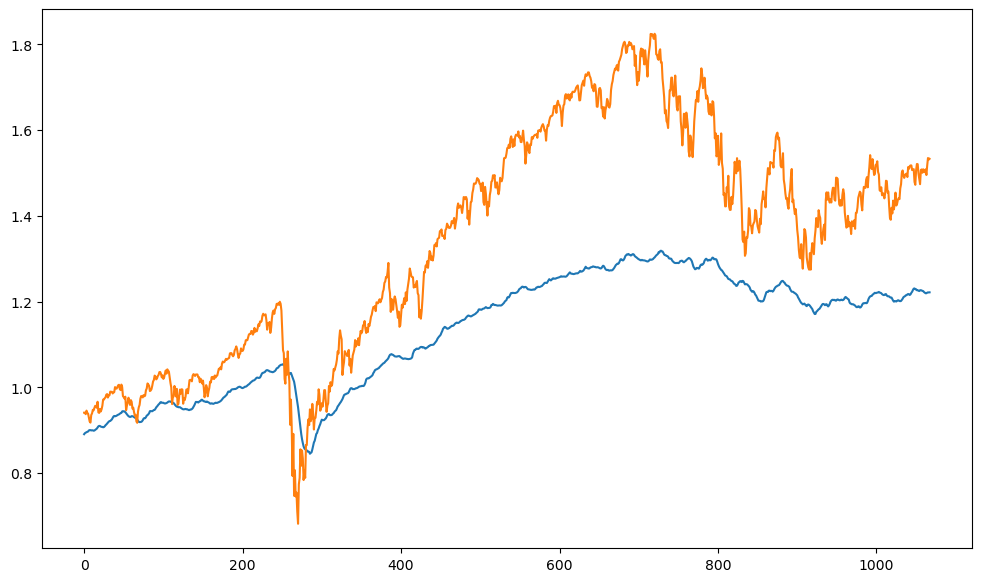

In [20]:
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(predict)
ax.plot(y_test)